## Outline

I was originally interested in using bisection to calculate the inverse of invertible functions. To that end, I wanted to first prove that invertible functions are strictly monotone, as I needed that property to implement the bisection algorithm as I originally imagined it. So that is what the lemmas and corollaries are below to show.

As I was writing the bisection algorithm, it occurred to me that it's not necessary that the function be invertible, for the core idea of the algorithm to work, only continuous. After all, continuity alone is enough to guarentee that if $y$ is a value between two elements of the range of $f$, and that if $f$ is continuous on the relevant interval, that $y$ is in $f$ image of that range. In a manner, $f$ has inverses, just not necessarily unique inverses.

After the proofs, is a presentation of the bisection algorithm itself (in a strange format I must admit). It's almost presented as a proof that there exists a sequence $\{a_i\}$ between our initial bounds $[a_0, b_0]$ such that $\{f(a_i)\}$ converges to $y$, where $y$ is the value which we would like to apply an inverse of $f$ to. In any case, my hope is that if you follow along, both the method and the reason of the algoirthm will be clear (even if it isn't quite spelled out).

Presented along with it is a small discussion about how to get guarentees on the accuracy of the algorithm.

To clear up any last confusion, and to provide a demonstration, I still include a python code sample of an implementation which will hopefully clear up the method of the algorithm.

## Preliminary Math

**Lemma (continuous functions pass through every intermediate value):**

Let $f$ be continuous on $[a, b]$. Then, if $y \in [min(f(a), f(b)), max(f(a), f(b))]$, $\exists x \in [a, b]$ such that $f(x) = y$.

**Proof:**

First off, if $y = f(a)$ or $y = f(b)$, we're done immediately.

Otherwise, either $f(a) < f(b)$ or $f(b) < f(a)$, as if they're equal then we must have $y = f(a) = f(b)$.

First, we'll assume $f(a) < f(b)$ (so $y \in (f(a), f(b))$. Let

$$\alpha = \sup\{x\in[a, b] : f(x) < y\}.$$

Note, $\alpha$ is finite because the set is bounded and non-empty (it contains $a$). Now, since $\alpha$ is a supremum of a non-empty set, there exists a sequence $\{x_k\}$ of elements of $\{x\in[a, b] : f(x) < y\}$ such that $x_k\rightarrow\alpha$. Since $f$ is continuous, this implies

$$f(\alpha) = \lim_{k\rightarrow\infty}f(x_k) \leq y.$$

In particular, this means that $\alpha \neq b$, as if it did, then $f(b) = f(\alpha) \leq y$, which contradictions our assumption that $y\in(f(a), f(b))$. This means that $\alpha \in [a, b)$, and $f$ will be defined and continuous (eventually) on a sequence which approaches $\alpha$ from above.

Similarly, since $\{\alpha + \frac1k\}_k$ is a sequence which converges to $\alpha$ as $k\rightarrow\infty$, and since $\alpha + \frac1k > \alpha$ implies $\alpha + \frac1k \nless y$ (because $\alpha$ is the supremum of such points), i.e., $\alpha + \frac1k \geq y$, the continuity of $f$ implies

$$f(\alpha) = \lim_{k\rightarrow\infty}f\left(\alpha + \frac1k\right) \geq y/$$

Taken together, these two statements imply $f(\alpha) = y$. Since we already knew $\alpha \in [a, b]$, the claim is proved in this case.

The case in which $f(a) > f(b)$ (meaning $y \in (f(b), f(a))$) is analagous, except then

$$\alpha = \inf\{x\in[a, b] : f(x) < y\}.$$

$\alpha$ is finite because this set is also bounded and non-empty (it contains $b$). Because $\alpha$ is an infinum, there is a sequence in $[a, b]$ of elements $x_k$ such that $f(x_k) < y$ which converge to $\alpha$, so the continuity of $f$ implies $f(\alpha) \leq y$.

Similarly, since $\alpha$ can't equal $a$ (as then $f(a) = f(\alpha) \leq y$), the sequence $\{\alpha - \frac1k\} \subset [a, b]$ for large enough $k$, and since the elements of those sequences are all lower bounds for the set of $x$ such that $f(x) < y$, we must have that $f(x_k) \geq y$. And so the continuity of $f$ implies $f(\alpha) \geq y$, and thus $f(\alpha) = y$, $\alpha \in [a, b]$, as claimed. $\blacksquare$

**Corollary:**

Let $f$ be continuous on $[a, b]$. Then Then, if $y \in (min(f(a), f(b)), max(f(a), f(b)))$, $\exists x \in (a, b)$ such that $f(x) = y$.

**Proof:**

By the lemma, since $y \in (min(f(a), f(b)), max(f(a), f(b)) \subset [min(f(a), f(b)), max(f(a), f(b)]$, $\exists x \in [a, b]$ such that $f(x) = y$.

Since $f(x) = y \neq f(a)$, $x \neq a$, and similarly since $f(x) = y \neq f(b)$, $x \neq b$. Hence, $x \in (a, b)$ as claimed. $\blacksquare$

Note, in case you were wondering we really do need $f$ to be continuous on all of $[a, b]$, and not just $(a, b)$. First off, for the proof of the lemma, if $f$ is not continuous as $a$ or $b$, we could have $\alpha = a$ or $b$ (even if $y \in (f(a), f(b)$), so in principle we would need a different proof in we had only continuity on $(a, b)$. However, there's no point searching for such a proof as none exists, as a counter example is easy to come by. Consider the below graph

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

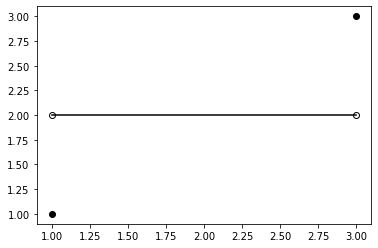

In [2]:
plt.plot([1, 3], [1, 3], "o", color='k')
plt.plot([1, 3], [2, 2], "o", fillstyle='none', color='k')
plt.plot([1, 3], [2, 2], color='k')
plt.show()

It is continuous everywhere but the endpoints, yet clearly does not pass through every value.

**Lemma:**

If $f$ is continuous and invertible on a connected set E (meaning if $a, b \in E$ s.t. $a < b$, then $[a, b] \subset E$), then if $a,b,x \in E$ and $a < b$, if $f(a) < f(b)$ then
\begin{align*}
x < a < b &\Rightarrow f(x) < f(a) < f(b)\\
a < x < b &\Rightarrow f(a) < f(x) < f(b)\\
a < b < x &\Rightarrow f(a) < f(b) < f(x)
\end{align*}
and if $f(a) > f(b)$
\begin{align*}
x < a < b &\Rightarrow f(x) > f(a) > f(b)\\
a < x < b &\Rightarrow f(a) > f(x) > f(b)\\
a < b < x &\Rightarrow f(a) > f(b) > f(x)
\end{align*}

**Proof:**

*First, suppose $f(a) < f(b)$ and $x < a < b$.*

If $f(a) < f(x) < f(b)$, then by the previous corollary, there exists $y \in (a, b) \subset E$ such that $f(x) = f(y)$. But since $x < a < y$, $x\neq y$, contradicting the assumption that $f$ is invertible.

If instead $f(a) < f(b) < f(x)$, then by the previous corollary, there exists $y \in (x, a) \subset E$ such that $f(b) = f(y)$. But since $y < a < b$, $y \neq b$, contradicting the assumption that $f$ is invertible.

Since $f(x)$ cannot equal $f(a)$ or $f(b)$ because $f$ is invertible, we must therefore have that $f(x) < f(a) < f(b)$.

*Second, suppose $f(a) < f(b)$ and $a < x < b$.*

If $f(x) < f(a) < f(b)$, then there exists $y \in (x, b) \subset E$ such that $f(y) = f(a)$. But since $a < x < y$, $a \neq y$, contradicting the assumption that $f$ is invertible.

If $f(a) < f(b) < f(x)$, then there exists $y \in (a, x) \subset E$ such that $f(y) = f(b)$. But since $y < x < b$, $y \neq b$,
contradicting the assumption that $f$ is invertible.

Thus we must have that $f(a) < f(x) < f(b)$.

*Third, suppose $f(a) < f(b)$ and $a < b < x$.*

If $f(x) < f(a) < f(b)$, then there exists $y \in (b, x) \subset E$ such that $f(y) = f(a)$. But since $a < b < y$, $a \neq y$, contradicting the assumption that $f$ is invertible.

If $f(a) < f(x) < f(b)$, then there exists $y \in (a, b) \subset E$ such that $f(y) = f(x)$. But since $y < b < x$, $y \neq x$,
contradicting the assumption that $f$ is invertible.

Thus we must have that $f(a) < f(b) < f(x)$.

If in the above three steps we flip all the inequalities between $f(a)$, $f(b)$, and $f(x)$, we've proved the second three claims. Hence all our claims are true. $\blacksquare$

That proof was quite formulaic, and to make it easier to comprehend, the idea is that the order of $f(a)$, $f(b)$, $f(x)$ must be ascending or descending according to the order of $x$, $a$, and $b$ in the domain. This is because if they're out of order, the previous lemma implies there is a second point $y$ which is in order and which $f$ evaluates to the out of order value. But since a value can't be both in and out of order, this $y$ cannot be the out of order point, implying $f$ is not invertible as it maps two points to $f(y)$.

Since we know $f$ is invertible, this is a contradiction, and it must be the case that $f(a)$, $f(b)$, and $f(x)$ are in order.

**Proposition (continuous invertible functions are strictly monotone):**

If $f$ is continuous and invertible on a connected set E (meaning if $a, b \in E$ s.t. $a < b$, then $[a, b] \subset E$), then $f$ is strictly monotone on $E$ (meaning either $x < y~\Rightarrow f(x) < f(y)~\forall x,y \in E$ or $x < y \Rightarrow f(x) > f(y)~\forall x,y \in E$).

**Proof:**

Let $a,b \in E$ such that $a < b$. Let $\asymp$ denote $<$ if $f(a) < f(b)$ and $>$ if $f(a) > f(b)$ (we cannot have $f(a) = f(b)$ as $f$ is invertible). Now let $x,y \in E$ such that $x < y$.

If $a < x$, then $b = x$, $a < x < b$, or $a < b < x$, and thus $f(a) \asymp f(x)$ (by the lemma in the latter two cases). Then, since $a < x < y$, by the lemma, $f(a) \asymp f(x) \Rightarrow f(x) \asymp f(y)$.

If $x < b$, then $a = x$, $x < a < b$, or $a < x < b$, and thus $f(x) \asymp f(b)$ (by the lemma in the latter two cases). Then, since either $b = y$, $x < y < b$, or $x < b < y$, $f(x) \asymp f(y)$ (by the lemma in the latter two cases).

Hence, if $a < b$ and $x < y$, then either both $f(a) < f(b)$ and $f(x) < f(y)$ or both $f(a) > f(b)$ and $f(x) > f(y)$, i.e., $f$ is strictly monotone on $E$. $\blacksquare$

To sum up the ideas we've seen hear, continous invertible functions must be strictly monoton, because in order to switch from increasing to decreasing or vice versa, for example, if $a < b < c$ but $f(a), f(c) < f(b)$, the function must pass over the points in $(f(a), f(b)) \cap (f(c), f(b))$ twice. Since $f$ is continuous, it must actually equal those values, once in the interval $(a, b)$ and once in the interval $(b, c)$. However, since $f$ is invertible, it can only equal those values once, yielding a contradiction. So $f$ must be strictly monotone.

I just had a bit of an ackward time handling all the different cases and not having a good way to express the idea that one number is in between two other numbers, without assuming the order of the two other numbers.

## The Algorithm

**Algorithm (Bisection):**

As a helpful notation, let $[x<>y]$ denote $[\min(x, y), \max(x, y)]$.

Suppose $f$ is a function continuous on an interval $[a_0, b_0]$ and $y \in [f(a_0)<>f(b_0)]$.

Now suppose $a_i, b_i\in [a_0, b_0]$ are such that $y \in [f(a_i)<>f(b_i)]$ and $b_i - a_i = \frac{b_i - a_i}{2^i}$.

If $y \in [f(a_i) <> f\left(\frac{a_i + b_i}2\right)]$, then let $a_{i+1} = a_i$ and let $b_{i+1} = \frac{a_i + b_i}2$, and otherwise it must be the case that $y \in [f\left(\frac{a_i + b_i}2\right) <> f(b_i)]$ and we let $a_{i+1} = \frac{a_i + b_i}2$ and $b_{i+1} = b_i$.

In either case,

$$y \in [f(a_{i+1}) <> f(b_{i+1})],$$
and
$$b_{i+1} - a_{i+1} = \frac{b_i - a_i}2 = \frac{b_0 - a_0}{2^{i+1}}.$$

Note also the sequence $\{a_i\}$ is monotonically increasing and bounded above by $b_0$ (as $a_i < b_i < b_0$) and the sequence $\{b_i\}$ is monotonically decreasing and bounded below by $a_0$ (as $b_i > a_i > a_0$). Thus both sequences must converge.

Hence, since

$$\lim_{i\rightarrow\infty}b_i - \lim_{i\rightarrow\infty}a_i = \lim_{i\rightarrow\infty}b_i-a_i = \lim_{i\rightarrow\infty}\frac{b_0-a_0}{2^i}=0$$

we see that both sequence converge to the same value, which we'll denote by $x$. Hence, since $f$ is continuous

$$f(x) = \lim_{i\rightarrow\infty}f(a_i) = \lim_{i\rightarrow\infty}f(b_i).$$

Finally, since in

$$|y - f(a_i)| < |f(b_i) - f(a_i)| \leq |f(b_i) - f(x)| + |f(x) - f(a_i)|$$
the right hand side can be made arbitrarily small by requiring that $i$ be sufficiently large (since both $\{f(a_i)\}$ and $\{f(b_i)\}$ converge to $f(x)$), we see that

$$y = \lim_{i\rightarrow\infty}f(a_i) = f(x).$$


**Commentrary:**

The algorithm isn't very good if we don't know how large our error is. Thankfully, depending on what error we're interested out, with just a little more information we can put bounds on our error.

Specifically, there are two things we might want to keep small:

(1) Return $p$ such that (for $x$ such that $f(x) = y$), $|p - x|$ is small.

(2) Return $p$ such that $|f(p) - y|$ is small.

The first is easy, as $a_i$ is always increasing, $b_i$ is always decreasing, and both are converging to $x$. So if, for example, we returned $a_i$ from our algorithm, and we wanted $|a_i - x| < error$, we can just continue until $i$ is such that $|a_i - b_i| < error$. The algorithm will eventually terminate on this condition because

$$|a_i - b_i| = \frac{|a_0 - b_0|}{2^i},$$

which is monotonically decreasing to zero as we increase $i$.

(2) is a bit more complicated. While $\lim_{i\rightarrow\infty}f(a_i) = y$, we are guarenteed to find $a_i$ such that $|f(a_i) - y| < error$ for any error we might be interested in. But there's no guarentee that $|f(a_{i+1}) - y)$ is also less than $error$. This could arise if the function looked like

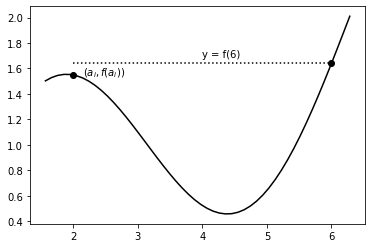

In [3]:
t = np.linspace(np.pi/2, 2*np.pi)
f = lambda x: .32*x + np.sin(x)
plt.plot(t, f(t), color='k')
plt.plot(2, f(2), 'o', color='k')
plt.annotate("$(a_i, f(a_i))$", (2.15, f(2)))
plt.plot(6, f(6), 'o', color='k')
plt.plot([2, 6], [f(6), f(6)], ':', color='k')
plt.annotate("y = f(6)", (4, f(6)+.05))
plt.show()

While $f(a_i)$ may be close to $y$, moving $a_i$ closer to $x$ (6 in this case) causes $f(a_i)$ to move further away from $y$, not closer (at least unti $a_i$ gets much closer to $x$). Whether or not this behavior is acceptable really depends on what you need your answer for.

For example, you might simply only require that both $|a_i - x|$ and $|f(a_i) - y|$ be small, in which case you can just loop the algorithm until both conditions are met (which must eventually happen).

But you might also be in a position where the above situation, where improving the accuracy of $a_i$ doesn't improve the accuracy of $f(a_i)$, isn't acceptable.

In that case you'll need a bit more information about $f$.

If $f$ satisfies a Lipschitz condition with Lipschitz ratio $M$ (meaning $|f(\alpha) - f(\beta)| \leq M|\alpha - \beta|$ for all $\alpha$ and $\beta$), then you can require that

$$|a_i - b_i| < \frac{error}{M}$$

That way, not only will $|f(a_i) - y| < error$, as

$$|f(a_i) - y| \leq |f(a_i) - f(b_i)| < M|a_i - b_i| < error,$$

but we also see that $|f(a_j) - y| < error$ for any $j \geq i$, as $|a_j - b_j| < |a_i - b_i|$, meaning we can establish an even smaller error bound.

This, of course, doesn't guarentee that $f(a_{i+1})$ will be a better approximation of $y$ than $f(a_i)$, but it does guarentee that if $a_i$ is such that $f(a_i)$ is a good approximation, then so too is $a_{i+1}$. With regards to the above picture, it's a way of saying that the dip we see between x=2 and x = 6 is smaller than our error.

Another way of simplifying the problem is if we know that $f$ is invertible, and thus monotone on $[a_0, b_0]$. Then the sort of dip we saw is impossible, and since

$$f(a_i) \leq f(a_{i+1}) \leq y \leq f(b_{i+1}) \leq f(b_i),$$

once $f(a_i)$ is close enough, we know all successive iterations of the algorithm will be close enough.

## Python Implementation

Below is an implementation of the bisection algorithm which doesn't assume $f$ is invertible and takes bounds on both the error of the returned value itself and the deviation between $y$ and $f$ applied to the return value.

In [4]:
def between(x, interval):
    a, b = interval
    return min(a, b) <= x and x <= max(a, b)

In [5]:
# Returns x in [a, b] such that for some x' in [a, b] s.t
# f(x') = y, |x - x'| < errors[0] and |f(x) - y| < errors[1]
# Precondition: for (a, b) = interval
# min(f(a), f(b)) <= y <= max(f(a), f(b))
def bisection(f, y, interval, errors):
    assert(between(y, (f(interval[0]), f(interval[1]))))
    a, b = interval
    while (b - a) > errors[0] or abs(f(a) - y) > errors[1]:
        half = (a + b)/2
        if between(y, (f(a), f(half))):
            b = half
        else:
            a = half
    return a

The code could be marginally simplified if we knew that $f$ was monotone, as then we could just compare `y` to `f(half)`, as `y` would always be in the range between `f(a)` and `f(b)`. But I think it's most clear as it is now.

Below is a plot of a test function $f$, $f^{-1}$ computed on the range using the above bisection implementation, and $f^{-1}$ composed with $f$ (to illustrate that the composition yields the identity).

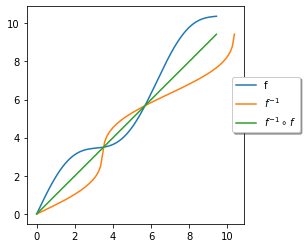

In [6]:
t = np.linspace(0, 3*np.pi, 1000)
f = lambda x: 1.1*x + np.sin(x)
ft = f(t)
plt.plot(t, f(t), label='f')
t_inverse = np.linspace(min(ft), max(ft), 100)
f_inverse = np.vectorize(lambda y: bisection(f, y, [0, 10], [.01, .01]), otypes=[float])
plt.plot(t_inverse, f_inverse(t_inverse), label='$f^{-1}$')
plt.plot(t, f_inverse(f(t)), label='$f^{-1}\circ f$')
plt.axis('square')
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.7), shadow=True, ncol=1)
plt.show()